In [4]:
#Steven Zajac-Descôteaux

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pld
import seaborn as sns

In [2]:
import sqlite3

# 1.1 Movies Database

Take the movies dataset and turn it into a single `sqlite` database. It should have one table for each csv file in the movies dataset

In [3]:
movies_url = {
"movies_metadata": "1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh",
"keywords": "1YLOIxb-EPC_7QpkmRqkq9E6j7iqmoEh3",
"ratings": "1_5HNurSOMnU0JIcXBJ5mv1NaXCx9oCVG",
"credits": "1bX9othXfLu5NZbVZtIPGV5Hbn8b5URPf",
"ratings_small": "1fCWT69efrj4Oxdm8ZNoTeSahCOy6_u6w",
"links_small": "1fh6pS7XuNgnZk2J3EmYk_9jO_Au_6C15",
"links": "1hWUSMo_GwkfmhehKqs8Rs6mWIauklkbP",
}

def read_gdrive(url):
    """
    Reads file from Google Drive sharing link
    """
    path = 'https://drive.google.com/uc?export=download&id='+url
    return pd.read_csv(path)

In [4]:
metadata = read_gdrive('1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh')
keywords = read_gdrive('1YLOIxb-EPC_7QpkmRqkq9E6j7iqmoEh3')
ratings = pd.read_csv('data/moviestuff/ratings.csv')
credits = read_gdrive('1bX9othXfLu5NZbVZtIPGV5Hbn8b5URPf')
ratings_small = read_gdrive('1fCWT69efrj4Oxdm8ZNoTeSahCOy6_u6w')
links_small = read_gdrive('1fh6pS7XuNgnZk2J3EmYk_9jO_Au_6C15')
links = read_gdrive('1hWUSMo_GwkfmhehKqs8Rs6mWIauklkbP')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
pd.read_csv("../4-1-sql-main/data/moviestuff/")

In [11]:
conn = sqlite3.connect('movies.sqlite')

table_names = [
    'credits','keywords','links','movies_metadata',
    'ratings','ratings_small'
    ]

for t in table_names:
    df = pd.read_csv(f"../4-1-sql-main/data/moviestuff/{t}.csv")
    df.to_sql(t,con=conn,index=False)
    
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",con=conn)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name
0,credits
1,keywords
2,links
3,movies_metadata
4,ratings
5,ratings_small


In [7]:
#metadata = pd.read_csv('data/moviestuff/movies_metadata.csv')
#ratings_small = pd.read_csv('data/moviestuff/ratings_small.csv')
#ratings = pd.read_csv('data/moviestuff/ratings.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
conn = sqlite3.connect('data/Movies_Fun')
c = conn.cursor()

In [9]:
metadata.to_sql(
    name='metadata',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

keywords.to_sql(
    name='keywords',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

ratings.to_sql(
    name='ratings',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

credits.to_sql(
    name='credits',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

ratings_small.to_sql(
    name='ratings_small',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

links_small.to_sql(
    name='links_small',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)

links.to_sql(
    name='links',
    con = conn,
    schema=None,
    if_exists='replace',
    index=True,
)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


# 1.2 Queries

**1.2.1** Use a single query to pull the original title of movies with a budget above $5m

**1.2.2** Use a query to pull the english-language films with the word `war` in their title

**1.2.3** Left join the average ratings from the `ratings` table onto the `movies_metadata` table, so you can have a relation between budget and rating. Hint: use a subquery.

In [9]:
pd.read_sql("SELECT original_title FROM movies_metadata WHERE budget > 5000000", con=conn)

,original_title
0,Jumanji
1,Heat
2,Sabrina
3,GoldenEye
4,The American President
...,...
2182,The Emoji Movie
2183,Pattaya
2184,House of the Long Shadows
2185,Все и сразу


In [10]:
#Need to convert Budget as int or float
pd.read_sql(
"""
Select
    original_title,
    CAST(budget AS float) as budget_int
FROM
    movies_metadata
WHERE
    budget_int > 5000000
ORDER BY
    budget_int
""", con=conn)

,original_title,budget_int
0,The Girl with All the Gifts,5005600.0
1,A Star Is Born,5019770.0
2,King of Kings,5037000.0
3,Metropia,5060730.0
4,Te3n,5069632.0
...,...,...
5166,Transformers: The Last Knight,260000000.0
5167,Superman Returns,270000000.0
5168,Avengers: Age of Ultron,280000000.0
5169,Pirates of the Caribbean: At World's End,300000000.0


In [9]:
pd.read_sql("SELECT * FROM movies_metadata WHERE original_language = 'en' AND original_title LIKE '%war%'", con=conn)

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,256,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,0,8.1,6778.0
1,286,False,"{'id': 300546, 'name': 'Once were Warriors Col...",0,"[{'id': 18, 'name': 'Drama'}]",None,527,tt0110729,en,Once Were Warriors,...,1994-09-02,2201126.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A family in crisis, a life in chaos... Nothing...",Once Were Warriors,0,7.6,106.0
2,335,False,None,0,"[{'id': 18, 'name': 'Drama'}]",None,19855,tt0111667,en,The War,...,1994-11-04,0.0,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,The War,0,6.3,39.0
3,551,False,None,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 36,...",None,26408,tt0108515,en,The War Room,...,1993-12-05,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They Changed The Way Campaigns Are Won,The War Room,0,7.3,19.0
4,587,False,None,1488423,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",http://movies.disney.com/snow-white-and-the-se...,408,tt0029583,en,Snow White and the Seven Dwarfs,...,1937-12-20,184925486.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The Happiest, Dopiest, Grumpiest, Sneeziest mo...",Snow White and the Seven Dwarfs,0,6.9,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,44303,False,None,60000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.netflix.com/title/80068327,354287,tt4758646,en,War Machine,...,2017-05-26,0.0,122.0,"[{'iso_639_1': 'ps', 'name': 'پښتو'}, {'iso_63...",Released,We're gonna liberate the sh** out of you.,War Machine,0,5.8,243.0
319,44350,False,None,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 99,...",http://www.hbo.com/documentaries/warning-this-...,452372,tt6710212,en,Warning: This Drug May Kill You,...,2017-05-01,0.0,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,America's prescription opiods kill more than p...,Warning: This Drug May Kill You,0,7.0,3.0
320,44765,False,None,0,"[{'id': 99, 'name': 'Documentary'}]",http://metanoia-films.org/psywar.php,59406,tt1900958,en,PsyWar: The real battlefield is your mind,...,2010-10-08,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Lucid and insightful study of the manipulati...,PsyWar: The real battlefield is your mind,0,6.6,4.0
321,44973,False,None,0,"[{'id': 18, 'name': 'Drama'}]",None,46661,tt0423510,en,Warm Springs,...,2005-04-30,0.0,121.0,[],Released,None,Warm Springs,0,5.8,6.0


In [10]:
pd.read_sql(
"""
SELECT *
FROM movies_metadata
LEFT JOIN(
    SELECT 
        AVG(rating) as avg_rating,
        movieId
    FROM ratings
    GROUP BY movieId
    )
ON movieId = id

""", con=conn)

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,avg_rating,movieId
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0,3.598930,862.0
1,1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0,3.760163,8844.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0.0,6.5,92.0,NaN,NaN
3,3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,0.0,6.1,34.0,NaN,NaN
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0.0,5.7,173.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,45461,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,0.0,4.0,1.0,NaN,NaN
45462,45462,False,None,0,"[{'id': 18, 'name': 'Drama'}]",None,111109,tt2028550,tl,Siglo ng Pagluluwal,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,None,Century of Birthing,0.0,9.0,3.0,2.583333,111109.0
45463,45463,False,None,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",None,67758,tt0303758,en,Betrayal,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,0.0,3.8,6.0,NaN,NaN
45464,45464,False,None,0,[],None,227506,tt0008536,en,Satana likuyushchiy,...,87.0,[],Released,None,Satan Triumphant,0.0,0.0,0.0,NaN,NaN


# 2. Baseball Database

The [Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) has an sqlite version. Download it for these exercises.

**2.1** Which player has had the most homeruns?

**2.2** Is there a relation between how many homeruns a player has made in a year and his salary that year? Pull both colums together in a single query



In [3]:
conn = sqlite3.connect('data/lahmansbaseballdb.sqlite')
c = conn.cursor()

In [4]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'",con=conn)

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n\t""ID"" INTEGER N..."
1,table,appearances,appearances,151,"CREATE TABLE ""appearances"" (\n\t""ID"" INTEGER N..."
2,table,awardsmanagers,awardsmanagers,3436,"CREATE TABLE ""awardsmanagers"" (\n\t""ID"" INTEGE..."
3,table,awardsplayers,awardsplayers,3445,"CREATE TABLE ""awardsplayers"" (\n\t""ID"" INTEGER..."
4,table,awardssharemanagers,awardssharemanagers,3603,"CREATE TABLE ""awardssharemanagers"" (\n\t""ID"" I..."
5,table,awardsshareplayers,awardsshareplayers,3622,"CREATE TABLE ""awardsshareplayers"" (\n\t""ID"" IN..."
6,table,batting,batting,3757,"CREATE TABLE ""batting"" (\n\t""ID"" INTEGER NOT N..."
7,table,battingpost,battingpost,6554,"CREATE TABLE ""battingpost"" (\n\t""ID"" INTEGER N..."
8,table,collegeplaying,collegeplaying,7006,"CREATE TABLE ""collegeplaying"" (\n\t""ID"" INTEGE..."
9,table,divisions,divisions,7282,"CREATE TABLE ""divisions"" (\n\t""ID"" INTEGER NOT..."


In [5]:
pd.read_sql("SELECT * FROM batting", con=conn).columns

Index(['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G',
       'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [6]:
#1.
pd.read_sql(
"""
SELECT
    playerID,
    SUM(HR) as HR,
    yearID
FROM batting GROUP BY playerID ORDER BY HR DESC
""", con=conn)

,playerID,HR,yearID
0,bondsba01,762,1986
1,aaronha01,755,1954
2,ruthba01,714,1914
3,rodrial01,696,1994
4,mayswi01,660,1951
...,...,...,...
19684,zuberbi01,0,1936
19685,zumayjo01,0,2006
19686,zupofr01,0,1957
19687,zuverge01,0,1951


In [29]:
df = pd.read_sql(
"""
SELECT 
    nameFirst First, 
    nameLast as Last, 
    sals.playerID, 
    salary, 
    sals.yearID, 
    HR 
FROM 
    salaries sals
INNER JOIN 
    batting
        ON batting.playerID = sals.playerID
        AND batting.yearID = sals.yearID
INNER JOIN 
    people ppl
        on ppl.playerID = sals.playerID
ORDER BY salary DESC
""", con=conn)

In [30]:
df

,First,Last,playerID,salary,yearID,HR
0,Alex,Rodriguez,rodrial01,33000000.0,2009,30
1,Alex,Rodriguez,rodrial01,33000000.0,2010,30
2,Clayton,Kershaw,kershcl01,33000000.0,2016,0
3,Clayton,Kershaw,kershcl01,32571000.0,2015,0
4,Alex,Rodriguez,rodrial01,32000000.0,2011,16
...,...,...,...,...,...,...
28289,Bobby,Witt,wittbo01,60000.0,1986,0
28290,Manuel,Lee,leema02,60000.0,1986,1
28291,Jeff,Musselman,musseje01,60000.0,1986,0
28292,Dave,Silvestri,silveda01,10900.0,1993,1


In [31]:
df.corr()

,salary,yearID,HR
salary,1.00000,0.36007,0.27569
yearID,0.36007,1.00000,0.02625
HR,0.27569,0.02625,1.00000


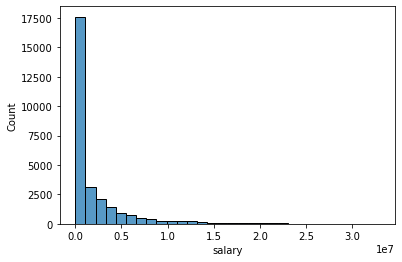

In [32]:
#df.yearID.value_counts()
sns.histplot(df.salary,bins=30);

In [52]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

X = df.HR
X = sm.add_constant(X)
df['salary_arcsinh'] = df.salary.apply(np.arcsinh) #Notes 3.3.2 because of the 0s
y = df['salary_arcsinh']

In [53]:
est = sm.OLS(y,X).fit()

In [54]:
est.summary() #Coefs are better with arcsinh

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         salary_arcsinh   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2325.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:00:28   Log-Likelihood:                -48360.
No. Observations:               28294   AIC:                         9.672e+04
Df Residuals:                   28292   BIC:                         9.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0715      0.009   1538.380      0.000      14.054      14.089
HR             0.0457      0.001     48.218      0.000       0.044       0.048
==============================================================================
Omnibus:                      370.361   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.291
Skew:                           0.268   Prob(JB):                     5.29e-82
Kurtosis:                       2.823   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Looking at the distribution we can use poisson 3.7

y = df['salary']

poisson = sm.Poisson(y,X).fit()
poisson.summary()

Optimization terminated successfully.
         Current function value: 1611070.186287
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 salary   No. Observations:                28294
Model:                        Poisson   Df Residuals:                    28292
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.09167
Time:                        11:00:29   Log-Likelihood:            -4.5584e+10
converged:                       True   LL-Null:                   -5.0184e+10
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3284   5.02e-06   2.86e+06      0.000      14.328      14.328
HR             0.0365    3.4e-07   1.07e+05      0.000       0.037       0.037
==============================================================================
"""

In [58]:
#Get R2 from poisson

y_hat = poisson.predict(X)
r2_score(df.salary,y_hat)
#Score is not as good as with previous model. Coefs are more similar between arcsinh and poisson

0.07424138082557452

The linear regression demonstrates that there is a relationship between homeruns and salar and that the relationship is statistically significant. However, home-runs are not necessarily the best predictor for salary, as the R2 is = 0.076, which is pretty weak. This could be understood as that the number of homeruns that a batter hits in a year does have an influence on their salary, however, it is definitely not the sole factor in salary determination. As it can be seen that some players with lower homeruns than others, have higher salary and vice versa. So in essence, homeruns is a good feature to look at to get an idea of the salary for a player, however, it is not a good determinant of the salary for that year...also important to consider that salaries are based on previous years and thus, a player with many homeruns for the current year will not see their salary impacted until the following year. 